In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_json("./jacow/papers.jsonlines", lines=True)
data.year = pd.to_datetime(data.year, format="%Y")

# Total paper count

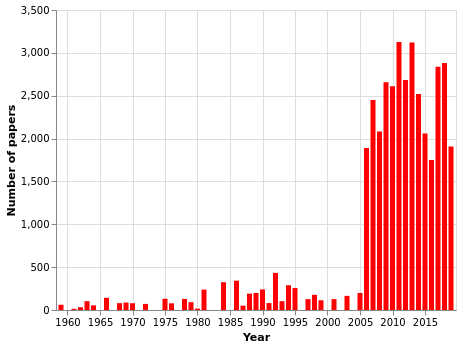

In [3]:
alt.Chart(
    data.year.value_counts().to_frame("freq").\
reset_index().rename(columns={"index": "year"})
).mark_bar(
    color="red",
).encode(
    alt.Y('freq',title="Number of papers"),
    alt.X('year:T',title="Year"),
)

# Number of papers per conference

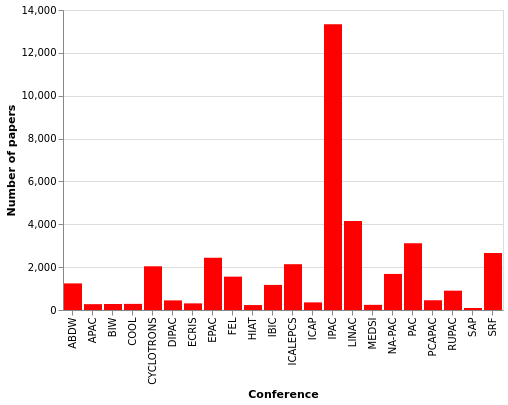

In [4]:
alt.Chart(
    data.conf.value_counts().reset_index(name="Number of papers").rename(columns={"index": "Conference"})
).mark_bar(
    color="red",
).encode(
    y='Number of papers',
    x='Conference:N',
)

# Keyword frequency

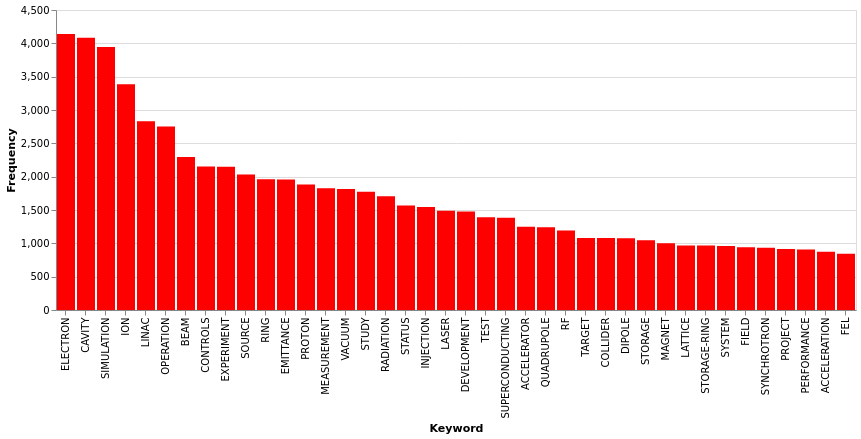

In [5]:
alt.Chart(
    data.keywords.apply(pd.Series).reset_index().melt(id_vars="index").value.dropna()
    .apply(lambda x: x if len(x) > 1 else np.nan).dropna().value_counts()
    .reset_index(name="Frequency").rename(columns={"index": "Keyword"}).head(40)
).mark_bar(
    color="red",
).encode(
    alt.X(field='Keyword', type='nominal',
          sort=alt.EncodingSortField(field='Frequency', order="descending")),
    y='Frequency:Q',

)

# Keyword trends

In [6]:
def keyword_trend(data, keyword, conf=None):
    if conf is not None:
        data = data[data.conf == conf]
    return(data[data.keywords.apply(lambda x: keyword in x)].year.
value_counts().to_frame("Frequency").reset_index().rename(columns={"index": "Year"}))

## Cavity

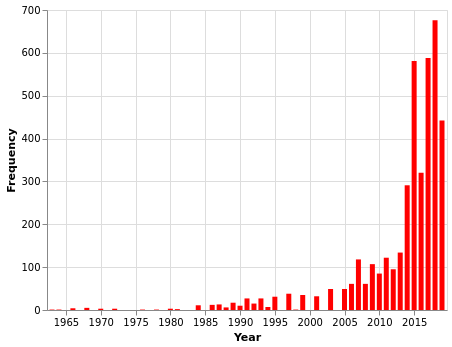

In [7]:
alt.Chart(
    keyword_trend(data, "CAVITY")
).mark_bar(
    color="red",
).encode(
    x='Year:T',
    y='Frequency:Q',
)

## Simulation

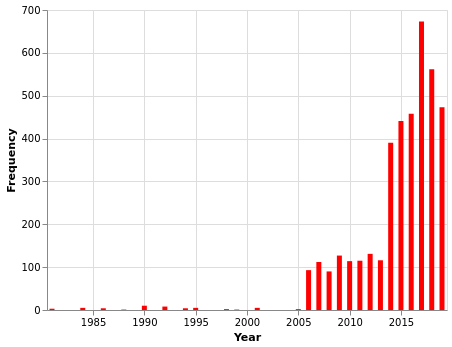

In [8]:
alt.Chart(
    keyword_trend(data, "SIMULATION")
).mark_bar(
    color="red",
).encode(
    x='Year:T',
    y='Frequency:Q',
)

## SRF

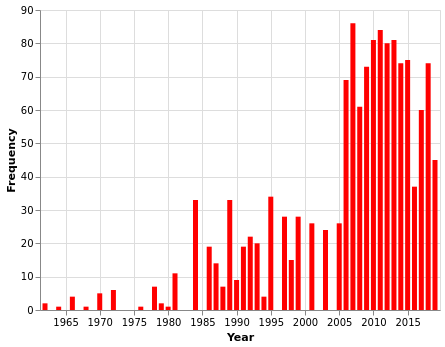

In [9]:
alt.Chart(
    keyword_trend(data, "SUPERCONDUCTING")
).mark_bar(
    color="red",
).encode(
    x='Year:T',
    y='Frequency:Q',
)

## SRF

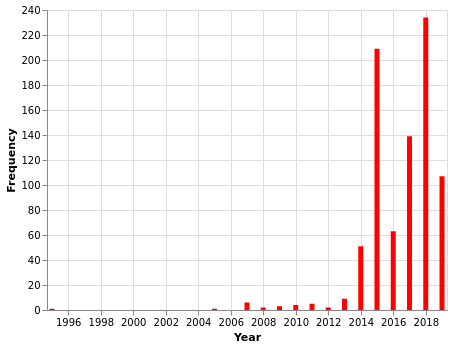

In [10]:
alt.Chart(
    keyword_trend(data, "SRF")
).mark_bar(
    color="red",
).encode(
    x='Year:T',
    y='Frequency:Q',
)

# Author trends

In [11]:
def author_trend(data, name):
    return(data[data.authors.apply(lambda y: any(map(lambda x: x.find(name) > 0,y)))].year.
value_counts().to_frame("Frequency").reset_index().rename(columns={"index": "Year"}))

## Padamsee

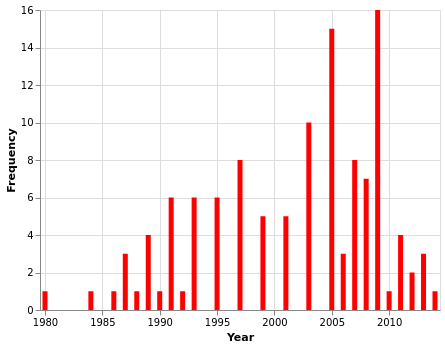

In [12]:
alt.Chart(
    author_trend(data, "PADAMSEE")
).mark_bar(
    color="red",
).encode(
    x='Year:T',
    y='Frequency:Q',
)

## Sobenin

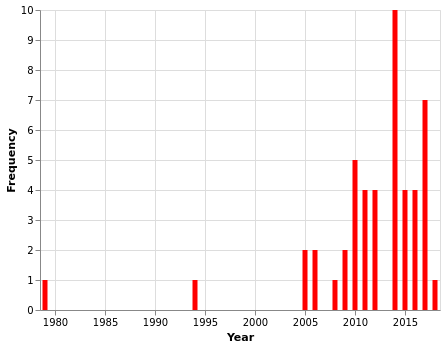

In [13]:
alt.Chart(
    author_trend(data, "SOBENIN")
).mark_bar(
    color="red",
).encode(
    x='Year:T',
    y='Frequency:Q',
)